<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/ctr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df0 = pd.read_csv('0-SQC_RAWDCDATA_202210061010.csv')
df1 = pd.read_csv('1-SQC_RAWDCDATA_202210061005.csv')
df1_2 = pd.read_csv('1-SQC_RAWDCDATA_202210061005_2.csv')

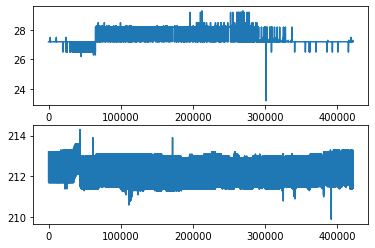

In [10]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(df0.하중측정)
plt.subplot(2,1,2)
plt.plot(df0.거리측정)

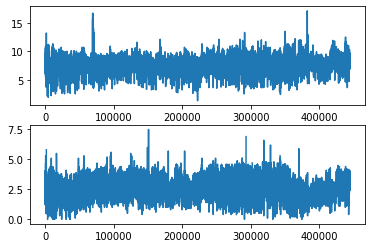

In [11]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(df1.기동측정값)
plt.subplot(2,1,2)
plt.plot(df1.작동측정값)

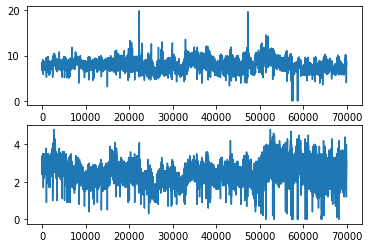

In [12]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(df1_2.기동측정값)
plt.subplot(2,1,2)
plt.plot(df1_2.작동측정값)

In [ ]:
df.loc[df.하중판정!='OK', '하중판정']=0
df.loc[df.하중판정=='OK', '하중판정']=1
df.loc[df.거리판정!='OK', '거리판정']=0
df.loc[df.거리판정=='OK', '거리판정']=1

In [ ]:
df.loc[df.기동판정!='OK', '기동판정']=0
df.loc[df.기동판정=='OK', '기동판정']=1
df.loc[df.작동판정!='OK', '작동판정']=0
df.loc[df.작동판정=='OK', '작동판정']=1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

models = [
    ('LR', LogisticRegression()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('NN', MLPClassifier()),
]

def fillNaNmean (X):
  col_mean = np.nanmean(X, axis=0)
  inds = np.where(np.isnan(X))
  X[inds] = np.take(col_mean, inds[1])
  return X

from sklearn.model_selection import train_test_split

# X = np.array(df[['하중상한', '하중하한', '하중측정']])
# y = np.array(df['하중판정'])
# y = y.astype('int')

# X = np.array(df[['거리상한', '거리하한', '거리측정']])
# y = np.array(df['거리판정'])
# y = y.astype('int')

# X = np.array(df[['기동상한값', '기동하한값', '기동측정값']])
# y = np.array(df['기동판정'])
# y = y.astype('int')

# X = np.array(df[['작동상한값', '작동하한값', '작동측정값']])
# y = np.array(df['작동판정'])
# y = y.astype('int')

X = fillNaNmean(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(name, accuracy)